In [31]:
%load_ext autoreload
%autoreload 2
import utils
import os
import numpy as np
from models import TestModels
import data
import moveFiles


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Prepare Data
1. Moves video files into train/test folders, randomly taking videos from the UCF dataset and assigning them to random classes. 
2. Extracts videos into frames
3. Applies video manipulations based on the assigned classes
4. Saves data to numpy files for use in Data Generator

In [38]:
file_limit = 50
moveFiles.moveFiles(file_limit)

#extract videos into frames and create CSV file
pp = data.Preprocessing()
pp.extractAllVideos()

dataset = data.DataSet()
#save training data to .npz files -- need for generator
dataset.dumpNumpyFiles()

  0%|          | 0/36 [00:00<?, ?it/s]

Exporting Train Data...


  0%|          | 0/9 [00:00<?, ?it/s]

Exporting Test Data


100%|██████████| 9/9 [00:33<00:00,  4.16s/it]


# 

In [ ]:
tm = TestModels(nclasses=5, 'lrcn')
gen = data.DataGenerator(batch_size = 1)
val = data.DataGenerator('test', batch_size = 1)
# tm.model.fit(x,y, batch_size=1, epochs=20, shuffle=True)
results = tm.model.fit_generator(gen, validation_data = val, epochs=5)

Epoch 1/5
16/16 [==============================] - ETA: 1:40 - loss: 2.1820 - acc: 0.0000e+0 - ETA: 52s - loss: 2.0560 - acc: 0.0000e+0 - ETA: 35s - loss: 1.9671 - acc: 0.0000e+ - ETA: 26s - loss: 1.8694 - acc: 0.0000e+ - ETA: 21s - loss: 1.8769 - acc: 0.0000e+ - ETA: 17s - loss: 1.8088 - acc: 0.1667   - ETA: 15s - loss: 1.8729 - acc: 0.14 - ETA: 12s - loss: 1.8164 - acc: 0.25 - ETA: 10s - loss: 1.8074 - acc: 0.22 - ETA: 8s - loss: 1.8084 - acc: 0.2000 - ETA: 6s - loss: 1.7913 - acc: 0.181 - ETA: 5s - loss: 1.7861 - acc: 0.166 - ETA: 3s - loss: 1.7663 - acc: 0.153 - ETA: 2s - loss: 1.7700 - acc: 0.142 - ETA: 1s - loss: 1.7385 - acc: 0.200 - 21s 1s/step - loss: 1.7302 - acc: 0.1875 - val_loss: 1.5380 - val_acc: 0.5000
Epoch 2/5
16/16 [==============================] - ETA: 9s - loss: 1.5242 - acc: 1.000 - ETA: 7s - loss: 1.5695 - acc: 0.500 - ETA: 6s - loss: 1.5264 - acc: 0.333 - ETA: 5s - loss: 1.4828 - acc: 0.500 - ETA: 5s - loss: 1.4666 - acc: 0.400 - ETA: 5s - loss: 1.4591 - acc: 0.

In [711]:
n=19
print(tm.model.predict_classes(np.array([x[n]])))
y[n]

[3]


array([0., 0., 0., 1.], dtype=float32)

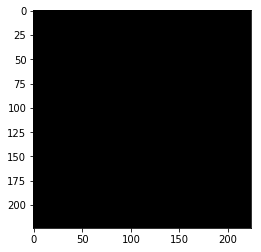

In [694]:
utils.displayImage(x[n][25])

In [39]:
x, y = dataset.all_data_from_npz('train')
# x1,y1=np.array([x[n]]),np.array([y[n]])
# tm.model.evaluate(x1,y1,batch_size=1)

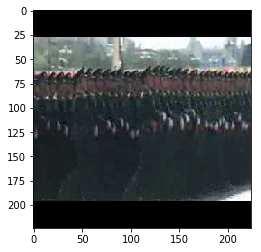

In [49]:
utils.displayImage(x[0][100])